In [1]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
images = []

for i in range(16, 47, 1):
    file = '../calor_alto_data/NGC6720/dubU_05' + str(i) + '.fits'
    images.append(pyfits.open(file))

In [3]:
airmass = []
for i in range(len(images)):
    airmass.append(images[i][0].header['AIRMASS'])

In [4]:
time = []
for i in range(len(images)):
    time.append(images[i][0].header['DATE-OBS'][11:])

In [5]:
print(time[5])

03:00:13.154


In [6]:
decimal_time = []
for t in time:
    (h, m, s) = t.split(':')
    decimal_time.append(int(h) * 3600 + int(m) * 60 + float(s))

In [7]:
time[0][:8]

'02:34:14'

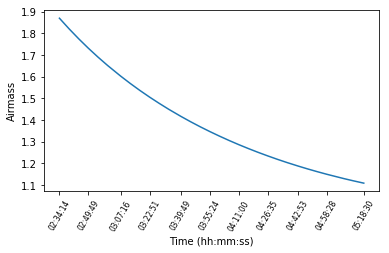

In [13]:
short_time = []
for t in time:
    short_time.append(t[:8])
    
fig = plt.figure()
fig.subplots_adjust(bottom=0.25)
ax = fig.add_subplot(111)
plt.plot(decimal_time, airmass)
plt.xticks(decimal_time[0::3], short_time[0::3], rotation=60, fontsize='7.5')
plt.ylabel('Airmass')
plt.xlabel('Time (hh:mm:ss)')
plt.savefig('../calor_alto_data/airmass.png')